In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\Machine Learning\\kyphosis.csv")

In [88]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [89]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [90]:
df['Age'].value_counts()

1      5
2      3
18     2
9      2
61     2
15     2
140    2
139    2
120    2
158    2
130    2
131    2
118    2
157    1
168    1
42     1
36     1
35     1
206    1
31     1
37     1
127    1
27     1
26     1
151    1
22     1
148    1
177    1
17     1
159    1
      ..
178    1
125    1
121    1
143    1
114    1
113    1
112    1
11     1
105    1
102    1
100    1
97     1
96     1
93     1
91     1
136    1
87     1
82     1
81     1
80     1
78     1
73     1
72     1
71     1
68     1
195    1
59     1
20     1
52     1
128    1
Name: Age, Length: 64, dtype: int64

In [91]:
df['Number'].value_counts()

3     23
4     18
5     17
2     12
7      5
6      4
10     1
9      1
Name: Number, dtype: int64

In [92]:
df['Start'].value_counts()

16    17
13    12
15     7
14     5
12     5
1      5
17     4
10     4
9      4
6      4
11     3
5      3
3      3
8      2
2      2
18     1
Name: Start, dtype: int64

In [106]:
x=df.drop(['Kyphosis','present'],axis=1)
y=df['present']

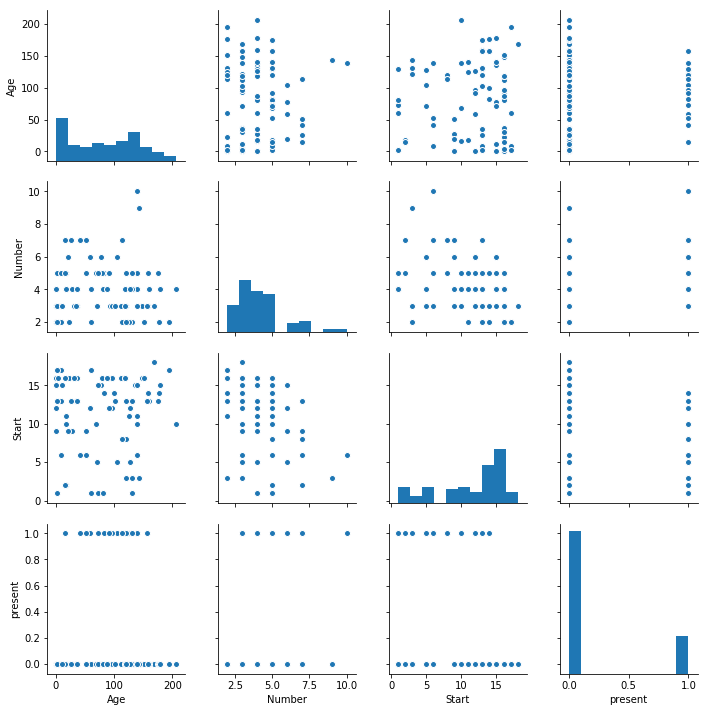

In [107]:
sns.pairplot(df)

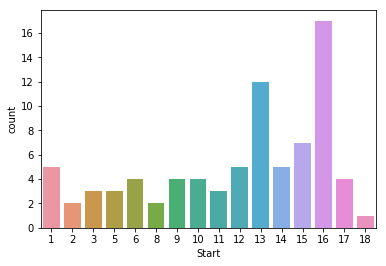

In [108]:
sns.countplot(x='Start',data=df)

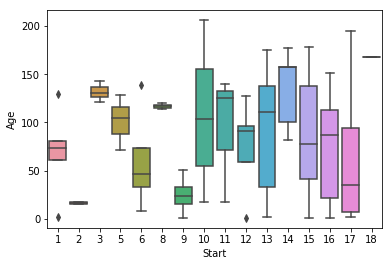

In [109]:
sns.boxplot(x="Start",y="Age",data=df)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
present     81 non-null uint8
dtypes: int64(3), object(1), uint8(1)
memory usage: 2.7+ KB


In [111]:
df.describe()

,Age,Number,Start,present
count,81.000000,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827,0.209877
std,58.104251,1.619423,4.883962,0.409758
min,1.000000,2.000000,1.000000,0.000000
25%,26.000000,3.000000,9.000000,0.000000
50%,87.000000,4.000000,13.000000,0.000000
75%,130.000000,5.000000,16.000000,0.000000
max,206.000000,10.000000,18.000000,1.000000


In [114]:
x=df.drop(['Kyphosis','present'],axis=1)
y=df['present']

In [113]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [101]:
y

0      absent
1      absent
2     present
3      absent
4      absent
5      absent
6      absent
7      absent
8      absent
9     present
10    present
11     absent
12     absent
13     absent
14     absent
15     absent
16     absent
17     absent
18     absent
19     absent
20     absent
21    present
22    present
23     absent
24    present
25     absent
26     absent
27     absent
28     absent
29     absent
       ...   
51     absent
52    present
53     absent
54     absent
55     absent
56     absent
57    present
58     absent
59     absent
60    present
61    present
62     absent
63     absent
64     absent
65     absent
66     absent
67     absent
68     absent
69     absent
70     absent
71     absent
72     absent
73     absent
74     absent
75     absent
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [102]:
df=pd.concat([df,pd.get_dummies(df['Kyphosis'],drop_first=True)],axis=1)

In [125]:
df.head()

,Kyphosis,Age,Number,Start,present
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0


In [115]:
x.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [116]:
y

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
51    0
52    1
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    1
61    1
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    1
77    0
78    0
79    1
80    0
Name: present, Length: 81, dtype: uint8

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
model=LogisticRegression().fit(x_train,y_train)

In [121]:
pred=model.predict(x_test)

In [122]:
from sklearn.metrics import confusion_matrix,classification_report

In [123]:
print(confusion_matrix(y_test,pred))

[[13  1]
 [ 3  0]]


In [124]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87        14
          1       0.00      0.00      0.00         3

avg / total       0.67      0.76      0.71        17



In [126]:
#In the Case of Classification =>Label Y numeric bhi Ho skta h or ya Y Non-Numeric bhi ho skta And
#-but features Non-Numeric Nahi ho skta means X they needed to be Numeric

In [127]:
#Or Jab 2 hi Categories ho or 0 ya 1 ki format ho means binary ya Nah ho toh Logistic
#Or jab bhut sari Categories ho Label m then Random forest use Krta iss mai bhi 4-5 ho skti hai

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [130]:
from sklearn.svm import SVC

In [131]:
model=SVC().fit(x_train,y_train)

In [132]:
pred=model.predict(x_test)

In [133]:
from sklearn.metrics import confusion_matrix,classification_report

In [134]:
print(confusion_matrix(y_test,pred))

[[14  0]
 [ 3  0]]


In [135]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90        14
          1       0.00      0.00      0.00         3

avg / total       0.68      0.82      0.74        17



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
pg={'C':[0.01,0.001,1.0,2.0,3.0],'kernel':['rbf','linear'],'gamma':[5,4,3,2,1]}

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
grid=GridSearchCV(SVC(),pg,refit=True,verbose=3)

In [147]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.01, gamma=5, kernel=rbf .....................................
[CV]  C=0.01, gamma=5, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=0.01, gamma=5, kernel=rbf .....................................
[CV]  C=0.01, gamma=5, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=0.01, gamma=5, kernel=rbf .....................................
[CV] ........... C=0.01, gamma=5, kernel=rbf, score=0.8, total=   0.0s
[CV] C=0.01, gamma=5, kernel=linear ..................................
[CV]  C=0.01, gamma=5, kernel=linear, score=0.7272727272727273, total=   0.0s
[CV] C=0.01, gamma=5, kernel=linear ..................................
[CV]  C=0.01, gamma=5, kernel=linear, score=0.8181818181818182, total=   0.0s
[CV] C=0.01, gamma=5, kernel=linear ..................................
[CV] ........ C=0.01, gamma=5, kernel=linear, score=0.8, total=   0.0s
[CV] C=0.01, gamma=4, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.01, gamma=3, kernel=rbf .....................................
[CV]  C=0.01, gamma=3, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=0.01, gamma=3, kernel=rbf .....................................
[CV]  C=0.01, gamma=3, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=0.01, gamma=3, kernel=rbf .....................................
[CV] ........... C=0.01, gamma=3, kernel=rbf, score=0.8, total=   0.0s
[CV] C=0.01, gamma=3, kernel=linear ..................................
[CV]  C=0.01, gamma=3, kernel=linear, score=0.7272727272727273, total=   0.0s
[CV] C=0.01, gamma=3, kernel=linear ..................................
[CV]  C=0.01, gamma=3, kernel=linear, score=0.8181818181818182, total=   0.0s
[CV] C=0.01, gamma=3, kernel=linear ..................................
[CV] ........ C=0.01, gamma=3, kernel=linear, score=0.8, total=   0.0s
[CV] C=0.01, gamma=2, kernel=rbf .....................................
[CV]  C=0.01, gamma=2, kernel=rbf, score=0.77272727272

[CV] ............ C=1.0, gamma=2, kernel=rbf, score=0.8, total=   0.0s
[CV] C=1.0, gamma=2, kernel=linear ...................................
[CV]  C=1.0, gamma=2, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV] C=1.0, gamma=2, kernel=linear ...................................
[CV]  C=1.0, gamma=2, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV] C=1.0, gamma=2, kernel=linear ...................................
[CV] ......... C=1.0, gamma=2, kernel=linear, score=0.9, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV]  C=1.0, gamma=1, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV]  C=1.0, gamma=1, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV] ............ C=1.0, gamma=1, kernel=rbf, score=0.8, total=   0.0s
[CV] C=1.0, gamma=1, kernel=linear ........................

[CV] ......... C=3.0, gamma=3, kernel=linear, score=0.9, total=   0.0s
[CV] C=3.0, gamma=2, kernel=rbf ......................................
[CV]  C=3.0, gamma=2, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=3.0, gamma=2, kernel=rbf ......................................
[CV]  C=3.0, gamma=2, kernel=rbf, score=0.7727272727272727, total=   0.0s
[CV] C=3.0, gamma=2, kernel=rbf ......................................
[CV] ............ C=3.0, gamma=2, kernel=rbf, score=0.8, total=   0.0s
[CV] C=3.0, gamma=2, kernel=linear ...................................
[CV]  C=3.0, gamma=2, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV] C=3.0, gamma=2, kernel=linear ...................................
[CV]  C=3.0, gamma=2, kernel=linear, score=0.7727272727272727, total=   0.0s
[CV] C=3.0, gamma=2, kernel=linear ...................................
[CV] ......... C=3.0, gamma=2, kernel=linear, score=0.9, total=   0.0s
[CV] C=3.0, gamma=1, kernel=rbf ...........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.001, 1.0, 2.0, 3.0], 'kernel': ['rbf', 'linear'], 'gamma': [5, 4, 3, 2, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [148]:
grid.best_params_

{'C': 1.0, 'gamma': 5, 'kernel': 'linear'}

In [149]:
grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
pred1=grid.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix,classification_report

In [155]:
print(confusion_matrix(y_test,pred1))

[[13  1]
 [ 3  0]]


In [156]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87        14
          1       0.00      0.00      0.00         3

avg / total       0.67      0.76      0.71        17



In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model=RandomForestClassifier().fit(x_train,y_train)

In [161]:
pred=model.predict(x_test)

In [162]:
from sklearn.metrics import confusion_matrix,classification_report

In [163]:
print(confusion_matrix(y_test,pred))

[[14  0]
 [ 3  0]]


In [164]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      1.00      0.90        14
          1       0.00      0.00      0.00         3

avg / total       0.68      0.82      0.74        17



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
